In [1]:
pip install tensorflow-io==0.27.0 tensorflow-model-optimization==0.7.3 redis==4.3.4 cherrypy==18.8.0 paho-mqtt==1.6.1


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import redis
from time import time


redis_host = "************"
redis_port = **************
REDIS_USERNAME = 'default'
REDIS_PASSWORD = 'your-password'


redis_client = redis.Redis(host=redis_host, port=redis_port)
is_connected = redis_client.ping()
print('Redis Connected:', is_connected)



Redis Connected: True


In [3]:
import redis

import psutil
import uuid
import time
from time import sleep
from time import time
from datetime import datetime


mac_address = hex(uuid.getnode())

# Connect to Redis
redis_host = "****************+"
redis_port = ************
REDIS_USERNAME = 'default'
REDIS_PASSWORD = 'your-password'


redis_client = redis.Redis(host=redis_host, port=redis_port)
is_connected = redis_client.ping()
print('Redis Connected:', is_connected)

retention_period_1d=86400000
retention_period_30d=retention_period_1d*30


print('===Battery info===')
print('Memory Usage (bytes):', redis_client.ts().info('0xb0a46095b5ff:battery').memory_usage)
print('Total Samples:', redis_client.ts().info('0xb0a46095b5ff:battery').total_samples)
print('# of Chunks:',  redis_client.ts().info('0xb0a46095b5ff:battery').chunk_count)
print()

print('===Power info===')
print('Memory Usage (bytes):', redis_client.ts().info('0xb0a46095b5ff:power').memory_usage)
print('Total Samples:', redis_client.ts().info('0xb0a46095b5ff:power').total_samples)
print('# of Chunks:',  redis_client.ts().info('0xb0a46095b5ff:power').chunk_count)
print()

print('===Battery Uncompressed info===')
print('Memory Usage (bytes):', redis_client.ts().info('0xb0a46095b5ff:battery_uncompressed').memory_usage)
print('Total Samples:', redis_client.ts().info('0xb0a46095b5ff:battery_uncompressed').total_samples)
print('# of Chunks:',  redis_client.ts().info('0xb0a46095b5ff:battery_uncompressed').chunk_count)
print()

print('===Power Uncompressed info===')
print('Memory Usage (bytes):', redis_client.ts().info('0xb0a46095b5ff:power_uncompressed').memory_usage)
print('Total Samples:', redis_client.ts().info('0xb0a46095b5ff:power_uncompressed').total_samples)
print('# of Chunks:',  redis_client.ts().info('0xb0a46095b5ff:power_uncompressed').chunk_count)
print()


compressed_memory = redis_client.ts().info('0xb0a46095b5ff:power').memory_usage
uncompressed_memory = redis_client.ts().info('0xb0a46095b5ff:power_uncompressed').memory_usage
savings = 100 * (uncompressed_memory - compressed_memory) / uncompressed_memory
print(f'Memory Savings for Battery: {savings:.2f}%')
compressed_memory = redis_client.ts().info('0xb0a46095b5ff:power').memory_usage
uncompressed_memory = redis_client.ts().info('0xb0a46095b5ff:power_uncompressed').memory_usage
savings = 100 * (uncompressed_memory - compressed_memory) / uncompressed_memory
print(f'Memory Savings for Power: {savings:.2f}%')

Redis Connected: True
===Battery info===
Memory Usage (bytes): 8536
Total Samples: 1542
# of Chunks: 41

===Power info===
Memory Usage (bytes): 2296
Total Samples: 1542
# of Chunks: 11

===Battery Uncompressed info===
Memory Usage (bytes): 8360
Total Samples: 1542
# of Chunks: 2

===Power Uncompressed info===
Memory Usage (bytes): 4184
Total Samples: 1542
# of Chunks: 1

Memory Savings for Battery: 45.12%
Memory Savings for Power: 45.12%


In [4]:
import redis

import psutil
import uuid
import time
from time import sleep
from time import time
from datetime import datetime


mac_address = hex(uuid.getnode())

# Connect to Redis
redis_host = "*************"
redis_port = *************+
REDIS_USERNAME = 'default'
REDIS_PASSWORD = 'your-password'


redis_client = redis.Redis(host=redis_host, port=redis_port)
is_connected = redis_client.ping()
print('Redis Connected:', is_connected)

from datetime import datetime

from_str = '2022-10-20 23:11:37'
to_str   = '2022-10-26 23:52:37'

from_datetime = datetime.fromisoformat(from_str)
from_timestamp = from_datetime.timestamp()
from_timestamp_ms = int(from_timestamp * 1000)

to_datetime = datetime.fromisoformat(to_str)
to_timestamp = to_datetime.timestamp()
to_timestamp_ms = int(to_timestamp * 1000)
values = redis_client.ts().range('0xb0a46095b5ff:battery', from_timestamp_ms, to_timestamp_ms)

print(len(values))

Redis Connected: True
1542


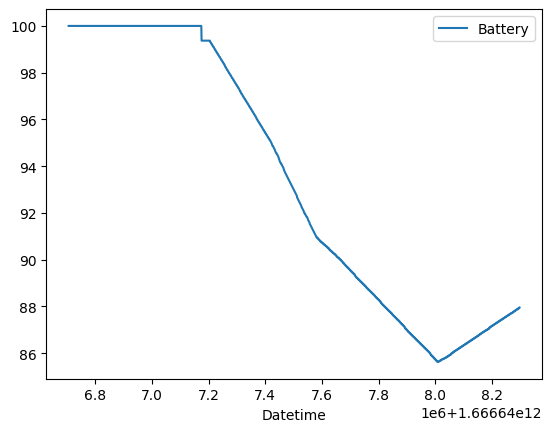

In [6]:
import pandas as pd

df_battery = pd.DataFrame(values, columns=['Datetime', 'Battery'])
#display(df_battery)
#import matplotlib.pyplot as plt
df_battery.plot(x='Datetime', y='Battery')#, kind='scatter') #'Datetime', 'Battery'
plt.show()

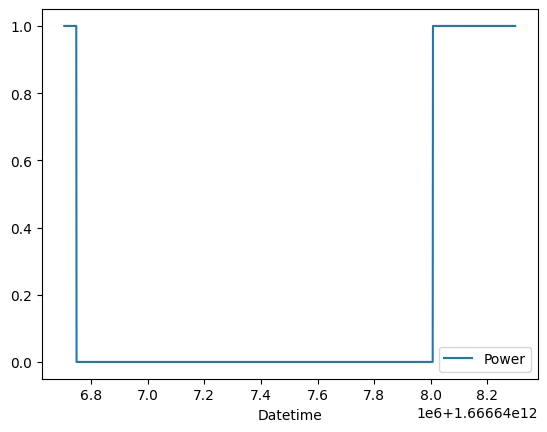

In [7]:
values_power = redis_client.ts().range('0xb0a46095b5ff:power', from_timestamp_ms, to_timestamp_ms)

df_power = pd.DataFrame(values_power, columns=['Datetime', 'Power'])
#display(df_battery)
#import matplotlib.pyplot as plt
df_power.plot(x='Datetime', y='Power')#, kind='scatter') #'Datetime', 'Battery'
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5fdd27d5-37cf-4cfc-9233-bb3fa1bbd087' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>